# Salary Prediction and Job Title Analysis: A Data-driven Approach

###### This project predicts salaries based on diverse factors such as education level, gender, and years of experience. By examining the frequency and significance of job titles, valuable insights are extracted to understand the correlation between job roles and compensation

In [96]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import os 

In [97]:
# Construct the file path
current_path = os.getcwd()
path = os.path.join(current_path, "Salary_Data.csv")

# Read data
data = pd.read_csv(path)
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [98]:
data.shape

(6704, 6)

In [99]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [100]:
data[data.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [101]:
# Handling Missing Values
data = data.drop(data[data["Education Level"].isnull()].index, axis=0)
data['Years of Experience'].fillna(data["Years of Experience"].mean(), inplace=True)

data[data.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.000000,NaN
5247,26.0,Female,Bachelor's Degree,Social M,8.094851,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.000000,NaN


In [102]:
# Filling Missing Salary Values Based on Education Level Means

mean_salary_by_education = data.groupby("Education Level")["Salary"].mean()

data.loc[data["Salary"].isnull(),"Salary"] = data.loc[data["Salary"].isnull()].apply(
    lambda row: mean_salary_by_education[row["Education Level"]], axis =1)

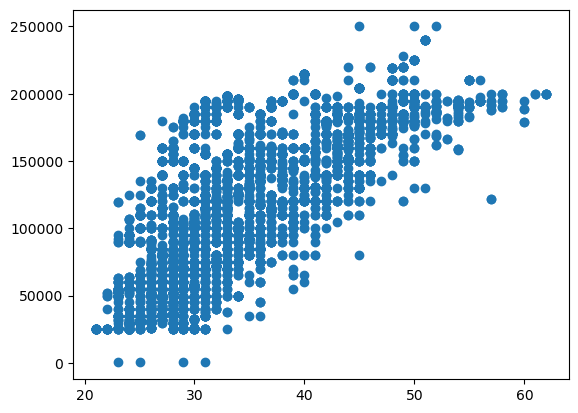

In [103]:
# Age and Salary Graphical Correlation
plt.scatter(data["Age"],data["Salary"])
plt.show()

In [104]:
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [105]:
# Standardizing education level values by removing duplicates

duplicate_mapping = {x: "Bachelor's" if x=="Bachelor's Degree" else "PhD" if x=="phD" 
                     else "Master's" if x=="Master's Degree" else x for x in  data["Education Level"].unique()}

data["Education Level"] = data["Education Level"].apply(lambda x: duplicate_mapping[x])

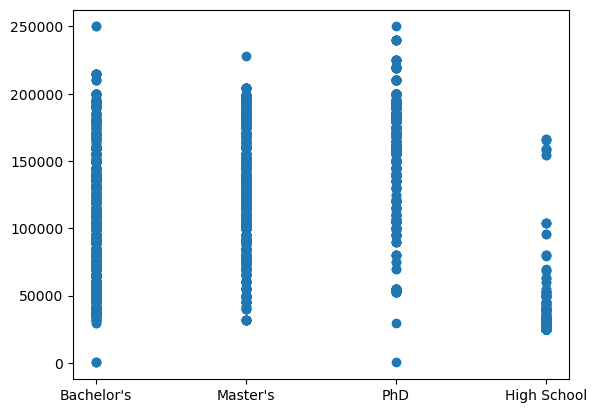

In [106]:
plt.scatter(data["Education Level"],data["Salary"])
plt.show()

In [107]:
len(data["Job Title"].unique())

192

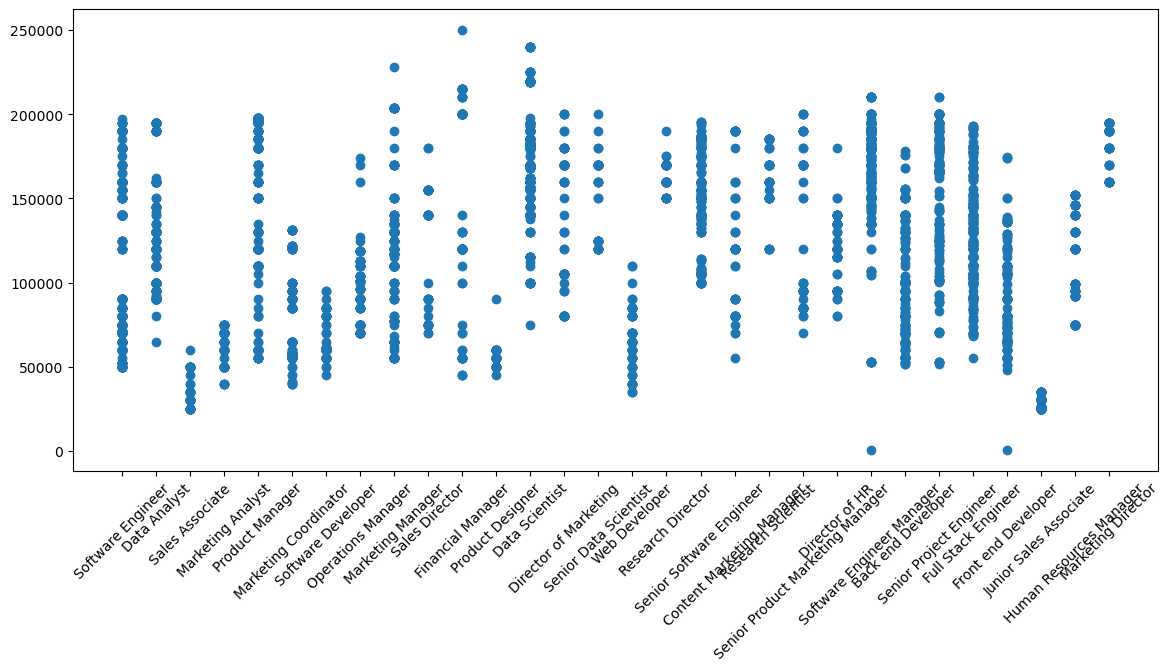

In [108]:
# Creating a scatter plot for the most common job titles
common_titles = data.groupby("Job Title")["Job Title"].count().sort_values(ascending = False)[:30].index

plot_data = data[data["Job Title"].isin(common_titles)]
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
plt.scatter(plot_data["Job Title"],plot_data["Salary"] )
plt.show()

### Create Dummy Variables and Handle Multicollinearity

In [109]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [110]:
# Perform one-hot encoding for 'Education Level' and 'Gender' columns

data = pd.get_dummies(data, columns=[ "Gender"], drop_first=True)
data = pd.get_dummies(data, columns=["Education Level"], prefix='E')

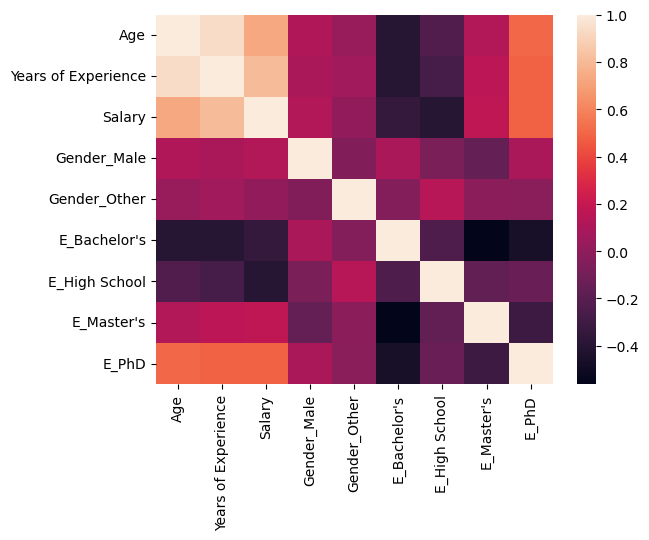

In [111]:
without_job_title = data.drop(["Job Title"], axis = 1)
correlation = sns.heatmap(without_job_title.corr())

### REMOVE OUTLIERS

In [112]:
# check outliers for Years of Experience
data.sort_values(by = "Years of Experience", ascending = True)[["Age","Years of Experience"]].head(3)

,Age,Years of Experience
5193,22.0,0.0
5622,24.0,0.0
4949,21.0,0.0


In [113]:
data.sort_values(by = "Years of Experience", ascending = False)[["Age","Years of Experience"]].head(3)

,Age,Years of Experience
2421,60.0,34.0
2501,60.0,34.0
2401,57.0,33.0


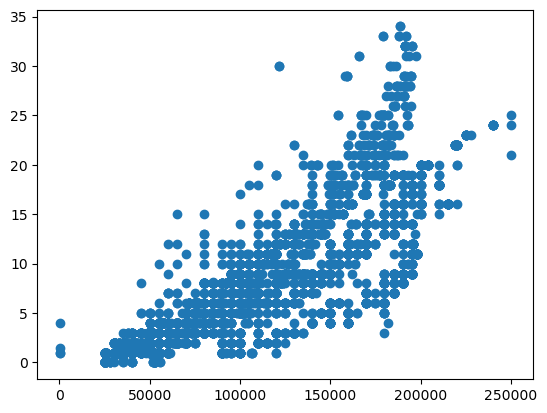

In [115]:
# check outliers for Salary
plt.scatter(data["Salary"],data["Years of Experience"] )
plt.show()

In [116]:
# Remove outlier salary values
data = data[data["Salary"]>10000]

In [117]:
data.head(3)

,Age,Job Title,Years of Experience,Salary,Gender_Male,Gender_Other,E_Bachelor's,E_High School,E_Master's,E_PhD
0,32.0,Software Engineer,5.0,90000.0,True,False,True,False,False,False
1,28.0,Data Analyst,3.0,65000.0,False,False,False,False,True,False
2,45.0,Senior Manager,15.0,150000.0,True,False,False,False,False,True


In [118]:
X = data.drop(["Salary"], axis = 1)
y = data["Salary"]
X.head(5)

,Age,Job Title,Years of Experience,Gender_Male,Gender_Other,E_Bachelor's,E_High School,E_Master's,E_PhD
0,32.0,Software Engineer,5.0,True,False,True,False,False,False
1,28.0,Data Analyst,3.0,False,False,False,False,True,False
2,45.0,Senior Manager,15.0,True,False,False,False,False,True
3,36.0,Sales Associate,7.0,False,False,True,False,False,False
4,52.0,Director,20.0,True,False,False,False,True,False


In [124]:
# Assigning ranks to job titles

job_ranks = {'CEO':1, "Director":2,'Senior':3,"Associate":3, "Executive":4, 
             "Manager":4,  "Middle": 5,  'Junior':6, "Entry":7}

def give_rank(title):
    global count
    for word in title.split(" "):
        if word in job_ranks.keys():
            return job_ranks[word]
        
    # Avarage rank is used as a default rank
    return 3

data["rank"] = data["Job Title"].apply(give_rank)

In [128]:
print(len(data["Job Title"].unique()))

# Count the occurrence of words in job titles
word_count = dict(Counter([a for x in data["Job Title"] for a in x.split(" ")]))

print(word_count)

192
{'Software': 1377, 'Engineer': 1824, 'Data': 969, 'Analyst': 621, 'Senior': 965, 'Manager': 1756, 'Sales': 455, 'Associate': 219, 'Director': 443, 'Marketing': 1000, 'Product': 475, 'Coordinator': 261, 'Scientist': 638, 'Developer': 831, 'HR': 213, 'Financial': 197, 'Project': 360, 'Customer': 12, 'Service': 9, 'Rep': 2, 'Operations': 150, 'Entry': 1, 'Clerk': 1, 'Business': 35, 'VP': 2, 'of': 238, 'IT': 7, 'Support': 5, 'Recruiter': 4, 'Social': 19, 'Media': 18, 'Specialist': 35, 'Junior': 571, 'Consultant': 4, 'Designer': 110, 'CEO': 1, 'Accountant': 6, 'Technical': 3, 'Writer': 1, 'Generalist': 107, 'Success': 2, 'Executive': 39, 'UX': 6, 'Network': 1, 'Administrative': 2, 'Assistant': 2, 'Strategy': 1, 'Copywriter': 2, 'Account': 5, 'Help': 1, 'Desk': 1, 'Intelligence': 1, 'Event': 2, 'Finance': 3, 'Graphic': 23, 'Researcher': 2, 'Digital': 68, 'Representative': 87, 'Development': 14, 'Web': 130, 'Research': 194, 'Creative': 1, 'Human': 207, 'Resources': 206, 'Content': 74, 'Ch

In [131]:
# Unwanted words that are either part of English grammar or already used in position ranks
unwanted_words = ['of', 'Delivery', 'Junior','Senior', 'Director', 'Chief']

# Sort and filter mentioned words in job titles
positions_sorted = {k:v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse = True) if k not in unwanted_words}

# Map the job title of the first occurrence of each word in the positions_sorted dictionary
def map_to_most_mentioned(job_title):
    global positions_sorted
    
    words = job_title.split(" ")
    
    for k, v in positions_sorted.items():
        if k in words:
            return k 
    return words[0]

In [134]:

# Mapping each job title to its most mentioned keyword is a crucial to create dummy 
# variables from the job titles. This process ensures that each job title is represented by a categorical 
# variable that captures the most relevant keyword, facilitating further analysis and modeling.


In [135]:
data["Job Title"] = data["Job Title"].map(map_to_most_mentioned)
data["Job Title"].unique()

array(['Engineer', 'Data', 'Manager', 'Sales', 'Director', 'Marketing',
       'Scientist', 'Software', 'Analyst', 'Customer', 'Operations', 'IT',
       'Recruiter', 'Specialist', 'Developer', 'Consultant', 'Product',
       'CEO', 'Accountant', 'Technical', 'HR', 'Designer',
       'Administrative', 'Copywriter', 'Coordinator', 'Finance', 'UX',
       'Representative', 'Research', 'Creative', 'Human', 'Officer',
       'Financial', 'Project', 'Content', 'Web', 'Associate',
       'Researcher', 'Executive', 'Business', 'Engineering',
       'Receptionist', 'Social', 'Driver'], dtype=object)

In [136]:
data = pd.get_dummies(data, columns=["Job Title"])
data.head(5)

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,E_Bachelor's,E_High School,E_Master's,E_PhD,rank,...,Job Title_Research,Job Title_Researcher,Job Title_Sales,Job Title_Scientist,Job Title_Social,Job Title_Software,Job Title_Specialist,Job Title_Technical,Job Title_UX,Job Title_Web
0,32.0,5.0,90000.0,True,False,True,False,False,False,3,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,False,False,False,False,True,False,3,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,True,False,False,False,False,True,3,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,False,False,True,False,False,False,3,...,False,False,True,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,True,False,False,False,True,False,2,...,False,False,False,False,False,False,False,False,False,False



### Determine the best model for prediction 

In [143]:
# Selecting the optimal data split for maximizing the Linear Regression score

# Linear Regression
best_linear_regression = None
best_score =  -1

X = data.drop(["Salary"], axis=1)
y = data["Salary"]


x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.1)


for _ in range(100):
    x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.1)
    

    lin_model = LinearRegression()
    lin_model.fit(x_train, y_train)
    if lin_model.score(x_test, y_test) > best_score:
        best_score = lin_model.score(x_test, y_test)
        best_linear_regression = lin_model

In [148]:
# Comparison To Lasso and Ridge Regression

# Fit Lasso regression model
lasso_reg = Lasso(alpha=0.2, max_iter=100)
lasso_reg.fit(x_train, y_train)
lasso_score = lasso_reg.score(x_test, y_test) 

# Fit Ridge regression model
ridge_reg = Ridge(alpha=0.2, max_iter=100)
ridge_reg.fit(x_train, y_train)
ridge_score = ridge_reg.score(x_test, y_test)

# Print model scores
print(f"SCORE FOR LINEAR REGRESSION: {best_score}")
print(f"SCORE FOR LASSO REGRESSION: {lasso_score}")
print(f"SCORE FOR RIDGE REGRESSION: {ridge_score}")


SCORE FOR LINEAR REGRESSION: 0.8214128760310829
SCORE FOR LASSO REGRESSION: 0.7974248338677342
SCORE FOR RIDGE REGRESSION: 0.7980810512439916


/Users/saikodze/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+12, tolerance: 1.683e+09
  model = cd_fast.enet_coordinate_descent(


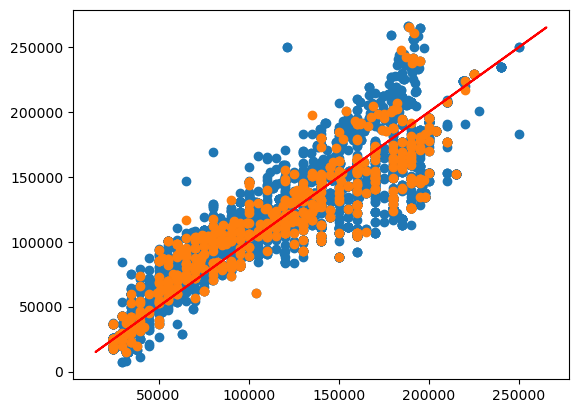

In [150]:
# Scatter plot comparing actual and predicted salaries for training and testing data

plt.scatter(y_train, best_linear_regression.predict(x_train))
plt.scatter(y_test, best_linear_regression.predict(x_test))

plt.plot(best_linear_regression.predict(x_test), best_linear_regression.predict(x_test), color='red')

plt.show()